### CNN Convolution Task

In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np



def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


#### Without Dropout

In [5]:
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)

x = MaxPooling2D(2)(x)

x = Flatten()(x)

x = Dense(50, activation='relu')(x)

output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [7]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - acc: 0.8809 - loss: 0.3723 - val_acc: 0.9778 - val_loss: 0.0697
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.9848 - loss: 0.0487 - val_acc: 0.9846 - val_loss: 0.0510
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.9903 - loss: 0.0301 - val_acc: 0.9847 - val_loss: 0.0491
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - acc: 0.9941 - loss: 0.0196 - val_acc: 0.9868 - val_loss: 0.0468
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.9957 - loss: 0.0144 - val_acc: 0.9851 - val_loss: 0.0572
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9961 - loss: 0.0111 - val_acc: 0.9861 - val_loss: 0.0510
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9973 - loss: 0.0088 - val_acc: 0.9872 - val_loss: 0.0525
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - acc: 0.9970 - loss: 0.0100 - val_acc: 0.9838 - val_loss: 0.0743
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9860 - loss: 0.0802


[0.05683509632945061, 0.9890999794006348]

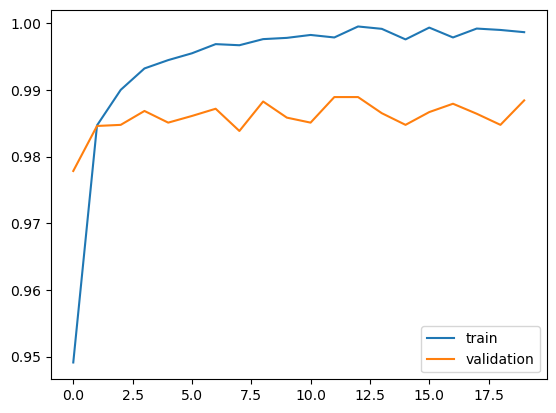

In [9]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### With Dropout

In [10]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)

x = MaxPooling2D(2)(x)

x = Flatten()(x)

x = Dropout(rate=0.5)(x)

x = Dense(50, activation='relu')(x)

output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [12]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - acc: 0.8819 - loss: 0.3815 - val_acc: 0.9822 - val_loss: 0.0644
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9805 - loss: 0.0640 - val_acc: 0.9827 - val_loss: 0.0585
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9858 - loss: 0.0443 - val_acc: 0.9851 - val_loss: 0.0488
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - acc: 0.9885 - loss: 0.0361 - val_acc: 0.9889 - val_loss: 0.0426
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9914 - loss: 0.0264 - val_acc: 0.9883 - val_loss: 0.0422
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9926 - loss: 0.0229 - val_acc: 0.9868 - val_loss: 0.0450
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9924 - loss: 0.0204 - val_acc: 0.9892 - val_loss: 0.0391
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - acc: 0.9938 - loss: 0.0171 - val_acc: 0.9885 - val_loss: 0.0414
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9860 - loss: 0.0596


[0.04433044418692589, 0.9890000224113464]

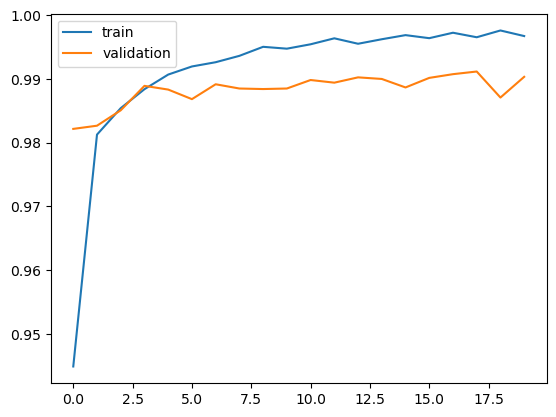

In [14]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### Dropout 적용 여부에 따른 `evaluate()` 결과와 검증 시각화

1. 테스트 데이터에 대한 `evaluate()`결과:

- Dropout 적용 전
  
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9860 - loss: 0.0802
[0.05683509632945061, 0.9890999794006348\]

- Dropout 적용 후

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9860 - loss: 0.0596
[0.04433044418692589, 0.9890000224113464\]

**📌accuracy는 약 0.9860으로 동일하였으나, loss가 약 0.0206만큼 차이나는 양상을 보였으며 Dropout 적용 후의 성능이 더 좋다고 평가된다.**

---

2. 검증 시각화

<img src="./images/convolution_task_without_dropout_validation.png" width="500"><img src="./images/convolution_task_with_dropout_validation.png" width="500">

**📌학습 데이터와 검증 데이터에 대한 정확도를 시각화한 결과, Dropout 적용 후 둘 간의 격차가 훨씬 줄어들었음을 알 수 있다.**